In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3055a99af3464697994102c4e129439e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ziaEFrxpp9VlbR2i-O9VEBf7s98a0o1KmoH3yAKIUe-J',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_3055a99af3464697994102c4e129439e.get_object(Bucket='b5mlr-donotdelete-pr-g7nrtcahgfwlhh',Key='50_Startups (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#head funtion and tail funtion
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.tail() #last 5 rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37
107,91749.16,114175.79,294919.57,Florida,124266.90


In [ ]:
#shape of the dataset
data.shape

(108, 5)

In [ ]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
#missing values

data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#statisticak overview of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,108.0,74959.338704,44996.368152,0.00,38558.510,75791.365,101913.08,165349.20
Administration,108.0,121750.788889,27322.385654,51283.14,105077.645,122699.795,145077.58,182645.56
Marketing Spend,108.0,214952.664722,117937.942120,0.00,134050.070,239452.750,298664.47,471784.10
Profit,108.0,113523.760000,38991.013654,14681.40,90708.190,109543.120,141585.52,192261.83


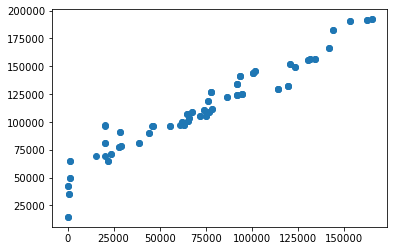

In [ ]:
#scatterplot
plt.scatter(data['R&D Spend'],data['Profit'])

In [ ]:
data=pd.get_dummies(data,columns=['State'])



In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
#split the data

x=data.drop(columns=['Profit']).values
y=data['Profit'].values

In [ ]:
x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression

MLR=LinearRegression()

MLR.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test

array([[1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.6426070e+04, 1.5769392e+05, 2.1079767e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1698380e+05, 4.5173060e+04, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3542692e+05, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.8558510e+04, 8.2982090e+04, 1.7499930e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0002300e+03, 1.2415304e+05,

In [ ]:
#predcition on the test data
y_pred=MLR.predict(x_test)
y_pred

array([136343.34197133,  90832.85683817, 172647.42254047, 155331.12791952,
       158785.10514412,  51634.15011859,  49905.57323719,  86103.32291818,
       157827.60539691,  49671.46016046,  91581.62060318, 134424.6195476 ,
       113253.60578916, 189369.02337601, 115672.83644421,  76631.63688209,
       148472.18891826, 158785.10514412, 102007.87287605, 191361.38045394,
       128581.07149281, 100490.34371904])

In [ ]:
#predccition in the train data 
pred=MLR.predict(x_train)
pred

array([ 50449.12770281,  73499.71909233,  92086.01282385, 136343.34197133,
       118793.0448569 ,  51634.15011859,  58698.38131987, 162654.53430073,
        86103.32291818, 128577.6876265 ,  65547.6339683 , 102469.55738443,
       110316.84000569, 162654.53430073, 130597.84020142,  99788.04947102,
        71282.16924568, 110305.7239298 , 170141.48779413,  67628.58285175,
       130597.84020142, 172647.42254047, 180062.2003637 , 129004.8133163 ,
       134424.6195476 ,  98422.57564727, 151468.9360692 , 118417.62797271,
       128577.6876265 , 118417.62797271,  75576.38825444, 129004.8133163 ,
       104189.52141549,  98198.37830444, 114976.18254906,  49905.57323719,
       110316.84000569, 148472.18891826, 113253.60578916,  99121.67020481,
        76631.63688209, 148472.18891826, 157827.60539691, 129004.8133163 ,
       189369.02337601, 115175.89677443, 102469.55738443, 191361.38045394,
       155331.12791952, 130597.84020142, 102007.87287605, 100490.34371904,
       128581.07149281,  

In [ ]:
#FInding accuracy

from sklearn.metrics import r2_score

acc=r2_score(y_test,y_pred)

acc

0.9409227545132924

In [ ]:
#test this model

MLR.predict([[160000,201000,471572,0,0,1]])

array([186163.35513591])

# deployment

In [ ]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 23.4 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.238
    Uninstalling ibm-watson-machine-learning-1.0.238:
      Successfully uninstalled ibm-watson-machine-learning-1.0.238


In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
wml_credentials = {
    "apikey":"your api-key",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [ ]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------------------  ------------------------
ID                                    NAME                            CREATED
d3b1b407-7544-4fe8-acbe-3ab545fb0b39  b5_space                        2022-10-14T06:25:08.825Z
2b49a34a-52a6-4cfd-8ae1-baa783da491c  loan                            2022-09-29T13:29:22.963Z
f91ba8b0-5523-4041-ab8b-6e0b4be46c30  Vehicle Performance Deployment  2022-08-19T09:26:51.020Z
19c7bd79-2237-49ce-a4d2-8130d85249ff  Loan_Approval                   2022-08-11T07:38:38.452Z
76c25383-bc90-40d9-a142-f0520208cdf5  TN deploy space                 2022-08-03T06:08:19.780Z
c65d0363-7bd5-42bf-b912-0a8b42125ad1  forest cover type               2022-08-01T06:20:37.889Z
77c033bf-40dc-4e25-8afb-5bea7f65de10  thyroid_deploy                  2022-07-01T10:38:57.405Z
92b7c539-a335-4e73-bcad-5f4d4e797f19  deploy space      

In [ ]:
space_id = "d3b1b407-7544-4fe8-acbe-3ab545fb0b39"

In [ ]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [ ]:
wml_client.software_specifications.list(500)

NameError: ignored

In [ ]:
MODEL_NAME = 'DemoModel'
DEPLOYMENT_NAME = 'demo_deploy'
DEMO_MODEL = MLR

In [ ]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [ ]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [ ]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-10-14T06:31:36.772Z',
  'id': 'e2fbc588-e2c3-4fcd-a134-8f3175bb992a',
  'modified_at': '2022-10-14T06:31:39.431Z',
  'name': 'DemoModel',
  'owner': 'IBMid-662003F89I',
  'resource_key': 'edf34048-2088-44c5-ba2f-f9bedaa20612',
  'space_id': 'd3b1b407-7544-4fe8-acbe-3ab545fb0b39'},
 'system': {'warnings': []}}